**Import necessary python libraries**

In [40]:
import tensorflow as tf
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np 

print("Libraries are imported successfully")
print("Tensorflow version: ",tf.__version__)


Libraries are imported successfully
Tensorflow version:  2.2.0


Download and load MNIT dataset

In [41]:
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data() 

  
# Translation of data  
# Reshape to 60000 x (28 x 28 x1)
X_Train_keras = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test_keras = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  

Features standardization and One-hot encoding



In [42]:
# Standardize feature data  
X_Train_keras_norm = X_Train_keras / 255  
X_Test_keras_norm = X_Test_keras /255  
      
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)



Create a convolutional neural network


In [43]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
      
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                     kernel_size=(5,5),  
                     padding='same',  
                     input_shape=(28,28,1),  
                     activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                  kernel_size=(5,5),  
                  padding='same',  
                  input_shape=(28,28,1),  
                  activation='relu'))  
      
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Add Dropout layer  
model.add(Dropout(0.25))  


Create two fully connected layer

In [44]:
model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
#Prevent overfitting
model.add(Dropout(0.5))  

#Ouput N-class probabilities
model.add(Dense(10, activation='softmax'))


model.summary()  
print("")  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

Start to train the CNN

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  

train_history = model.fit(x=X_Train_keras_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4999 - accuracy: 0.8445 - val_loss: 0.0995 - val_accuracy: 0.9712
Epoch 2/10
 - 1s - loss: 0.1316 - accuracy: 0.9603 - val_loss: 0.0606 - val_accuracy: 0.9822
Epoch 3/10
 - 1s - loss: 0.0963 - accuracy: 0.9715 - val_loss: 0.0507 - val_accuracy: 0.9844
Epoch 4/10
 - 1s - loss: 0.0773 - accuracy: 0.9765 - val_loss: 0.0421 - val_accuracy: 0.9866
Epoch 5/10
 - 1s - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0390 - val_accuracy: 0.9891
Epoch 6/10
 - 1s - loss: 0.0558 - accuracy: 0.9834 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 7/10
 - 1s - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0369 - val_accuracy: 0.9889
Epoch 8/10
 - 1s - loss: 0.0455 - accuracy: 0.9868 - val_loss: 0.0369 - val_accuracy: 0.9886
Epoch 9/10
 - 1s - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0313 - val_accuracy: 0.9902
Epoch 10/10
 - 1s - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0331 - val_accuracy: 0.9902


Display Training History

In [46]:
import os  
      
      
import matplotlib.pyplot as plt  
def plot_image(image): 
    #get current figure 
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
      
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
      
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  


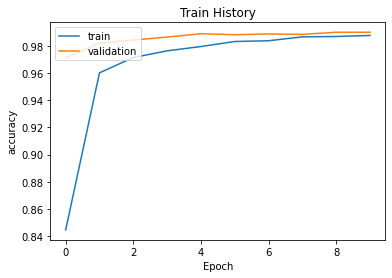

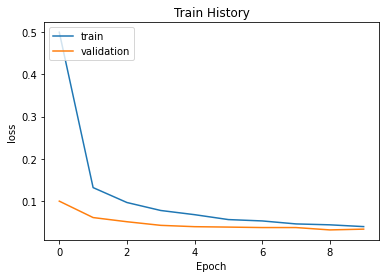

In [47]:
!pip3 install utils
from utils import *  

show_train_history(train_history, 'accuracy', 'val_accuracy')  
show_train_history(train_history, 'loss', 'val_loss')  

Test CNN

In [48]:
scores = model.evaluate(X_Test_keras_norm, y_TestOneHot)  
print()  
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 1s 61us/step

[Info] Accuracy of testing data = 99.1%


[Info] Making prediction of X_Test4D_norm

[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



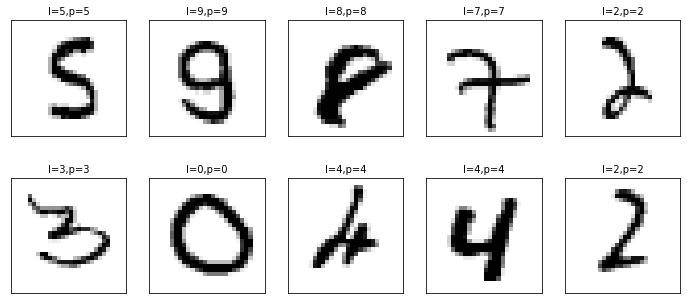

In [49]:
print("[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test_keras_norm)  # Making prediction and save result to prediction  
print()  
print("[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  

plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)  

In [50]:
import pandas as pd  
print("[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))  


[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        978     0     0     0    0    0    0     1    1    0
1          0  1133     1     0    0    0    0     1    0    0
2          1     2  1025     0    1    0    0     3    0    0
3          0     0     1  1007    0    2    0     0    0    0
4          0     0     0     0  979    0    1     0    0    2
5          2     0     0     5    0  881    1     1    0    2
6          6     2     0     0    1    4  945     0    0    0
7          0     2     3     1    0    0    0  1020    1    1
8          1     0     3     7    0    2    0     2  953    6
9          1     3     0     1    6    2    0     5    1  990

